✅ Saved: bias_scores_overall.csv
✅ Saved: bias_scores_by_gender.csv
✅ Saved: bias_trends_overall.png


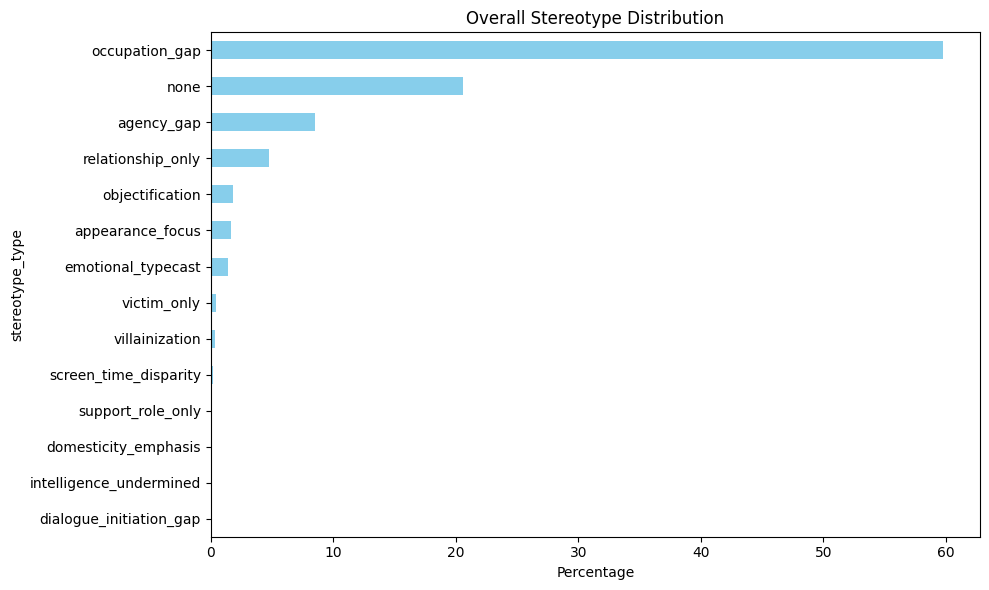

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the annotated dataset (replace with your file if needed)
df = pd.read_csv(r"D:\PROG\docu3C\BollyAI_2_0\output\ai_stereotype_annotated_final.csv")

# Check required columns
assert 'gender' in df.columns and 'stereotype_type' in df.columns, "Missing required columns."

# STEP 1: Overall stereotype distribution
overall_bias_counts = df['stereotype_type'].value_counts()
overall_bias_percentages = (overall_bias_counts / overall_bias_counts.sum()) * 100
overall_bias_percentages.to_csv(r"D:\PROG\docu3C\BollyAI_2_0\output\bias_scores_overall.csv", index_label="stereotype_type", header=["percentage"])
print("✅ Saved: bias_scores_overall.csv")

# STEP 2: Gender-wise stereotype breakdown
bias_by_gender = df.groupby(['gender', 'stereotype_type']).size().unstack(fill_value=0)
bias_by_gender_percent = bias_by_gender.div(bias_by_gender.sum(axis=1), axis=0) * 100
bias_by_gender_percent.to_csv(r"D:\PROG\docu3C\BollyAI_2_0\output\bias_scores_by_gender.csv", index_label="gender")
print("✅ Saved: bias_scores_by_gender.csv")

# STEP 3: Plot overall stereotype distribution
plt.figure(figsize=(10, 6))
overall_bias_percentages.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel("Percentage")
plt.title("Overall Stereotype Distribution")
plt.tight_layout()
plt.savefig(r"D:\PROG\docu3C\BollyAI_2_0\output\bias_trends_overall.png")
print("✅ Saved: bias_trends_overall.png")
plt.show()
